In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # For Plotting
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/fifa-world-cup-2022-complete-dataset/Fifa_world_cup_matches.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

I have imported matplotlib for graphs and now I will import the data into a variable

In [2]:
df = pd.read_csv("/kaggle/input/fifa-world-cup-2022-complete-dataset/Fifa_world_cup_matches.csv")
df.dropna( inplace = True)
df.tail()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
59,ENGLAND,FRANCE,54%,36%,10%,1,2,10 DEC 2022,20 : 00,Quarter-final,...,1,0,9,15,0,0,49,54,193,308
60,ARGENTINA,CROATIA,34%,54%,12%,3,0,13 DEC 2022,20 : 00,Semi-final,...,1,0,12,10,0,0,85,63,321,260
61,FRANCE,MOROCCO,34%,55%,11%,2,0,14 DEC 2022,20 : 00,Semi-final,...,0,0,13,14,0,0,72,47,328,218
62,CROATIA,MOROCCO,45%,45%,10%,2,1,17 DEC 2022,16 : 00,Play-off for third place,...,0,0,7,14,0,0,75,72,288,277
63,ARGENTINA,FRANCE,46%,40%,14%,3,3,18 DEC 2022,16 : 00,Final,...,1,2,11,21,0,0,87,104,280,409


I can see possession has percentage. So, it is a string. Now, I have to remove the percentage sign and convert it into string

In [3]:
df['possession team1'] = df['possession team1'].str.replace('%','').astype(int)
df['possession team2'] = df['possession team2'].str.replace('%','').astype(int)

Due to redundancy, I have created a pie chart that will show favour on the basis of win.
favours can be possession, defensiver pressures.

In [4]:
def pie_chart(team1,team2):
    win_1 = 0
    lose_1 = 0
    draw_1 = 0
    for i in range(len(df)):
        if df[team1][i]>df[team2][i] and df["number of goals team1"][i]>df['number of goals team2'][i]:
            win_1+= 1
        elif df[team1][i]<df[team2][i] and df["number of goals team1"][i]<df['number of goals team2'][i]:
            win_1+=1
        elif df[team1][i]>df[team2][i] and df["number of goals team1"][i]<df['number of goals team2'][i]:
            lose_1+=1
        elif df[team1][i]<df[team2][i] and df["number of goals team1"][i]>df['number of goals team2'][i]:
            lose_1+=1
        elif df[team1][i]>df[team2][i] and df["number of goals team1"][i]==df['number of goals team2'][i]:
            draw_1+=1
        elif df[team1][i]>df[team2][i] and df["number of goals team1"][i]==df['number of goals team2'][i]:
            draw_1+=1
    return win_1,lose_1,draw_1

def display_data(data,title):
    print (title)
    print("Win% =", str((data[0]/sum(data))*100)+"%")
    print("Lose% =",str((data[1]/sum(data))*100)+"%")
    print("Draw% =",str((data[2]/sum(data))*100)+"%","\n")

inserting data into multiple variables

In [5]:
win_pose, lose_pose,draw_pose= pie_chart('possession team1','possession team2')
win_dpa,lose_dpa,draw_dpa = pie_chart('defensive pressures applied team1','defensive pressures applied team2')
win_ft , lose_ft , draw_ft = pie_chart('forced turnovers team1','forced turnovers team2')
win_ta,lose_ta, draw_ta = pie_chart('total attempts team1','total attempts team2')

data_list = [[win_pose, lose_pose,draw_pose],[win_dpa,lose_dpa,draw_dpa],[win_ft , lose_ft , draw_ft],[win_ta,lose_ta, draw_ta]]
data_title = ["Posession","Defensive Pressures","Force Turnovers","Total Attempts"]
new_title = ["Posessing ball","applying defensive pressure more on your oppponents","force turnover","high number of attempts"]

creating subplots

Posession
Win% = 39.285714285714285%
Lose% = 44.642857142857146%
Draw% = 16.071428571428573% 

Defensive Pressures
Win% = 45.45454545454545%
Lose% = 43.63636363636363%
Draw% = 10.909090909090908% 

Force Turnovers
Win% = 56.896551724137936%
Lose% = 25.862068965517242%
Draw% = 17.24137931034483% 

Total Attempts
Win% = 59.61538461538461%
Lose% = 32.69230769230769%
Draw% = 7.6923076923076925% 



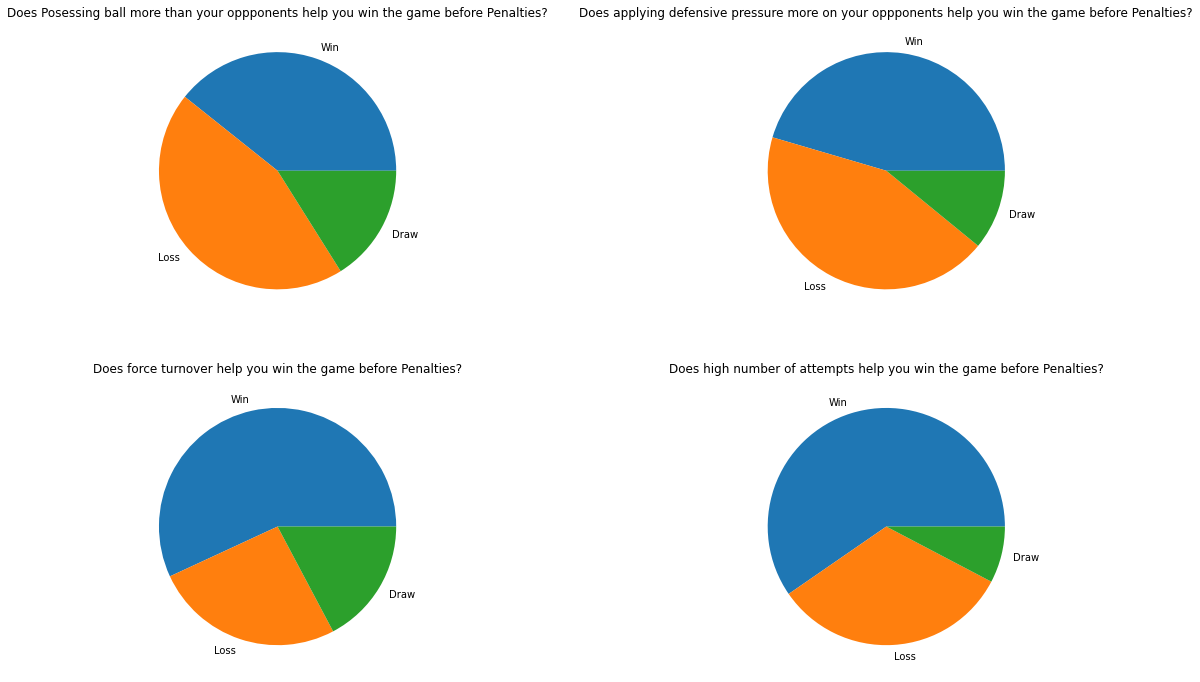

In [6]:
fig,axs = plt.subplots(2 , 2, figsize=(20,12))
axs[0,0].pie([win_pose,lose_pose,draw_pose],labels =["Win","Loss" , "Draw"])
axs[0,0].set_title("Does Posessing ball more than your oppponents help you win the game before Penalties?")
axs[0,1].pie([win_dpa,lose_dpa,draw_dpa],labels =["Win","Loss" , "Draw"])
axs[0,1].set_title("Does applying defensive pressure more on your oppponents help you win the game before Penalties?")
axs[1,0].pie([win_ft,lose_ft,draw_ft],labels = ["Win","Loss" , "Draw"])
axs[1,0].set_title("Does force turnover help you win the game before Penalties?")
axs[1,1].pie([win_ta,lose_ta,draw_ta],labels = ["Win","Loss" , "Draw"])
axs[1,1].set_title("Does high number of attempts help you win the game before Penalties?")

for x in range(len(data_list)):
    display_data(data_list[x],data_title[x])

Creating another plot for force turnover

win = 73.91304347826086% 
 loss = 8.695652173913043% 
 draw = 17.391304347826086%


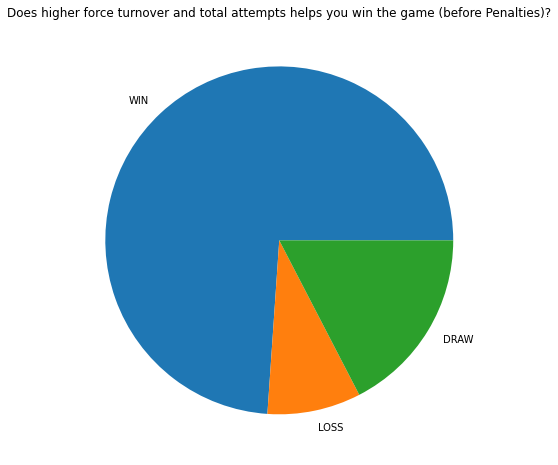

In [7]:
win_pos = 0
lose_pos = 0
draw_pos = 0
for i in range(len(df)):
    if df['total attempts team1'][i]>df['total attempts team2'][i] and df['forced turnovers team1'][i]>df['forced turnovers team2'][i] and df["number of goals team1"][i]>df['number of goals team2'][i]:
        win_pos+= 1
    elif df['total attempts team1'][i]<df['total attempts team2'][i] and df['forced turnovers team1'][i]<df['forced turnovers team2'][i] and df["number of goals team1"][i]<df['number of goals team2'][i]:
        win_pos+=1
    elif df['total attempts team1'][i]>df['total attempts team2'][i] and df['forced turnovers team1'][i]>df['forced turnovers team2'][i] and df["number of goals team1"][i]<df['number of goals team2'][i]:
        lose_pos+=1
    elif df['total attempts team1'][i]<df['total attempts team2'][i] and df['forced turnovers team1'][i]<df['forced turnovers team2'][i] and df["number of goals team1"][i]>df['number of goals team2'][i]:
        lose_pos+=1
    elif df['total attempts team1'][i]<df['total attempts team2'][i] and df['forced turnovers team1'][i]<df['forced turnovers team2'][i] and df["number of goals team1"][i]==df['number of goals team2'][i]:
        draw_pos+=1
    elif df['total attempts team1'][i]>df['total attempts team2'][i] and df['forced turnovers team1'][i]>df['forced turnovers team2'][i] and df["number of goals team1"][i]==df['number of goals team2'][i]:
        draw_pos+=1
fig = plt.figure(figsize = (12,8))
plt.pie([win_pos,lose_pos, draw_pos],labels = ["WIN",'LOSS', "DRAW"])
plt.title(f"Does higher force turnover and total attempts helps you win the game (before Penalties)?")
win = str((win_pos/(win_pos+lose_pos+draw_pos))*100) + "%"
loss = str((lose_pos/(win_pos+lose_pos+draw_pos))*100) + "%"
draw = str((draw_pos/(win_pos+lose_pos+draw_pos))*100) + "%"
print (f"win = {win}","\n",f"loss = {loss}","\n",f"draw = {draw}")

creating function which will calulate total mathces played and a function that will find the sum of variable like possession, turnovers etc.

In [8]:
def football_calc(team,variable):
    a = df[variable][df['team1']==team].sum()
    variable= variable.replace("1","2")
    b = df[variable][df['team2']==team].sum()
    return a+b
team_names = df['team1'].unique().tolist()
def match_calc(team,variable):
    a = df[variable][df['team1']==team].count()
    variable= variable.replace("1","2")
    b = df[variable][df['team2']==team].count()
    return a+b
team_names = df['team1'].unique().tolist()

In [9]:
def total_calc(names,var):    
    total_attempts = {}
    for i in names:
            value=football_calc(i,var)
            total_attempts[i]=value
    return total_attempts

total_matches={}
for i in team_names:
    value = match_calc(i,'team1')
    total_matches[i]=value

In [10]:
total_attempts = total_calc(team_names,'total attempts team1')
total_assists = total_calc(team_names,'assists team1')
total_on_target_attempts = total_calc(team_names,'on target attempts team1')
total_off_target_attempts = total_calc(team_names,'off target attempts team1')
total_off_sides = total_calc(team_names,'offsides team1')
total_passes_completed = total_calc(team_names,'passes completed team1')
total_goal_prevention = total_calc(team_names,'goal preventions team1')
total_goals = total_calc(team_names,'number of goals team1')

Creating new dataframe for all variable and merging them into single dataframe

In [11]:
new_df = pd.DataFrame(total_attempts.values(),index=total_attempts.keys(),columns=['total attempts'])
asfs = pd.DataFrame(total_assists.values(),index=total_assists.keys(),columns = ['total_assists'])
otfs = pd.DataFrame(total_on_target_attempts.values(),index=total_on_target_attempts.keys(),columns = ['total_on_target_attempts'])
offs = pd.DataFrame(total_off_target_attempts.values(),index=total_off_target_attempts.keys(),columns = ['total_off_target_attempts'])
osfs = pd.DataFrame(total_off_sides.values(),index=total_off_sides.keys(),columns = ['total_off_sides'])
pcfs = pd.DataFrame(total_passes_completed.values(),index=total_passes_completed.keys(),columns = ['total_passes_completed'])
gpfs = pd.DataFrame(total_goal_prevention.values(),index=total_goal_prevention.keys(),columns = ['total_goal_prevention'])
gofs = pd.DataFrame(total_goals.values(),index=total_goals.keys(),columns = ['total_goals'])
total_match = pd.DataFrame(total_matches.values(),index=total_matches.keys(),columns = ['total_matches_played'])

In [12]:
a_list = [asfs,otfs,pcfs,gpfs,offs,osfs,gofs,total_match]
for i in a_list:
    new_df = new_df.merge(right=i,right_index=True,left_index=True)

In [ ]:
columns = new_df.columns.tolist()
del columns[-1]
del columns[-1]

creating a function that will rank the 4 semi-finalist on few criteria. They can be possession, force turnover.

In [14]:
def data_analyser(dataframe,column,matches):
    a=[]
    for i in range(len(dataframe)):
        a.append(dataframe[column].iloc[i]/(dataframe[matches].iloc[i]))
    return a
    
rank_df=pd.DataFrame(index=new_df.index)

In [15]:
for l in columns:
    b=l.replace("total","Average")
    rank_df[b] = data_analyser(new_df,l,'total_matches_played')

In [16]:
rank_df = rank_df.drop(rank_df.columns[-1],axis=1)

In [17]:
def rank_calc(dataframe,team):
    rank_list={}
    a= dataframe.columns.tolist()
    descending,ascending = a[:-2],a[-2:]
    for i in ascending:
        dataframe.sort_values(by=i,inplace=True)
        value =dataframe.index.get_loc(team)
        rank_list[i]=f"#{value+1}"
        
    for i in descending:
        dataframe.sort_values(by=i,ascending=False,inplace=True)
        value =dataframe.index.get_loc(team)
        rank_list[i]=f"#{value+1}"
    return rank_list

In [18]:
l = rank_df.columns.tolist()
top_4_teams=["ARGENTINA","FRANCE","CROATIA","MOROCCO"]
rankings ={}
for x in range(len(top_4_teams)):
    rankings[top_4_teams[x]]= rank_calc(rank_df,top_4_teams[x])
    print (top_4_teams[x])
    print("\n")
    for i in l:
        print (f"{i} {rankings[top_4_teams[x]][i]}")
    print("\n")

ARGENTINA


Average attempts #3
Average_assists #11
Average_on_target_attempts #3
Average_passes_completed #3
Average_goal_prevention #2
Average_off_target_attempts #27


FRANCE


Average attempts #4
Average_assists #2
Average_on_target_attempts #7
Average_passes_completed #11
Average_goal_prevention #17
Average_off_target_attempts #27


CROATIA


Average attempts #14
Average_assists #12
Average_on_target_attempts #10
Average_passes_completed #6
Average_goal_prevention #19
Average_off_target_attempts #20


MOROCCO


Average attempts #25
Average_assists #21
Average_on_target_attempts #26
Average_passes_completed #26
Average_goal_prevention #16
Average_off_target_attempts #11


